# importing libraries and datasets

In [5]:
pip install jupyterthemes;

Note: you may need to restart the kernel to use updated packages.


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme="monokai",context="notebook",ticks=True,grid=False)
creditcard_df=pd.read_csv("datasets_14701_19663_CC GENERAL.csv")

In [6]:
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [7]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [21]:
print(creditcard_df["BALANCE"].min())
print(creditcard_df["BALANCE"].max())
print(creditcard_df["BALANCE"].mean())

0.0
19043.13856
1564.4748276781038


## visualizing the dataset

In [22]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [45]:
creditcard_df[creditcard_df["ONEOFF_PURCHASES"]==creditcard_df["ONEOFF_PURCHASES"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [46]:
creditcard_df[creditcard_df["CASH_ADVANCE_TRX"]==creditcard_df["CASH_ADVANCE_TRX"].max()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
542,C10566,1284.633140,1.0,55.50,0.0,55.50,5406.459348,0.083333,0.00,0.083333,0.833333,123,1,3000.0,3432.757202,421.385587,0.0,12
2159,C12226,10905.053810,1.0,431.93,133.5,298.43,47137.211760,0.583333,0.25,0.500000,1.000000,123,21,19600.0,39048.597620,5394.173671,0.0,12
8315,C18536,2648.244646,1.0,0.00,0.0,0.00,10458.978150,0.000000,0.00,0.000000,1.000000,123,0,4000.0,9818.531412,665.888853,0.0,12


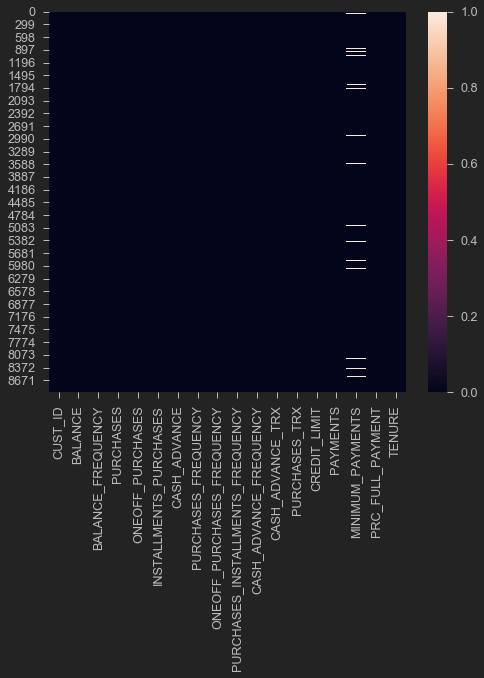

In [47]:
sns.heatmap(creditcard_df.isnull())
plt.show()

In [30]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [48]:
creditcard_df.loc[(creditcard_df["MINIMUM_PAYMENTS"].isnull()==True),"MINIMUM_PAYMENTS"]=creditcard_df["MINIMUM_PAYMENTS"].mean()

In [49]:
creditcard_df.loc[(creditcard_df["CREDIT_LIMIT"].isnull()==True),"CREDIT_LIMIT"]=creditcard_df["CREDIT_LIMIT"].mean()

In [50]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [35]:
creditcard_df.duplicated().sum()

0

In [51]:
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [52]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

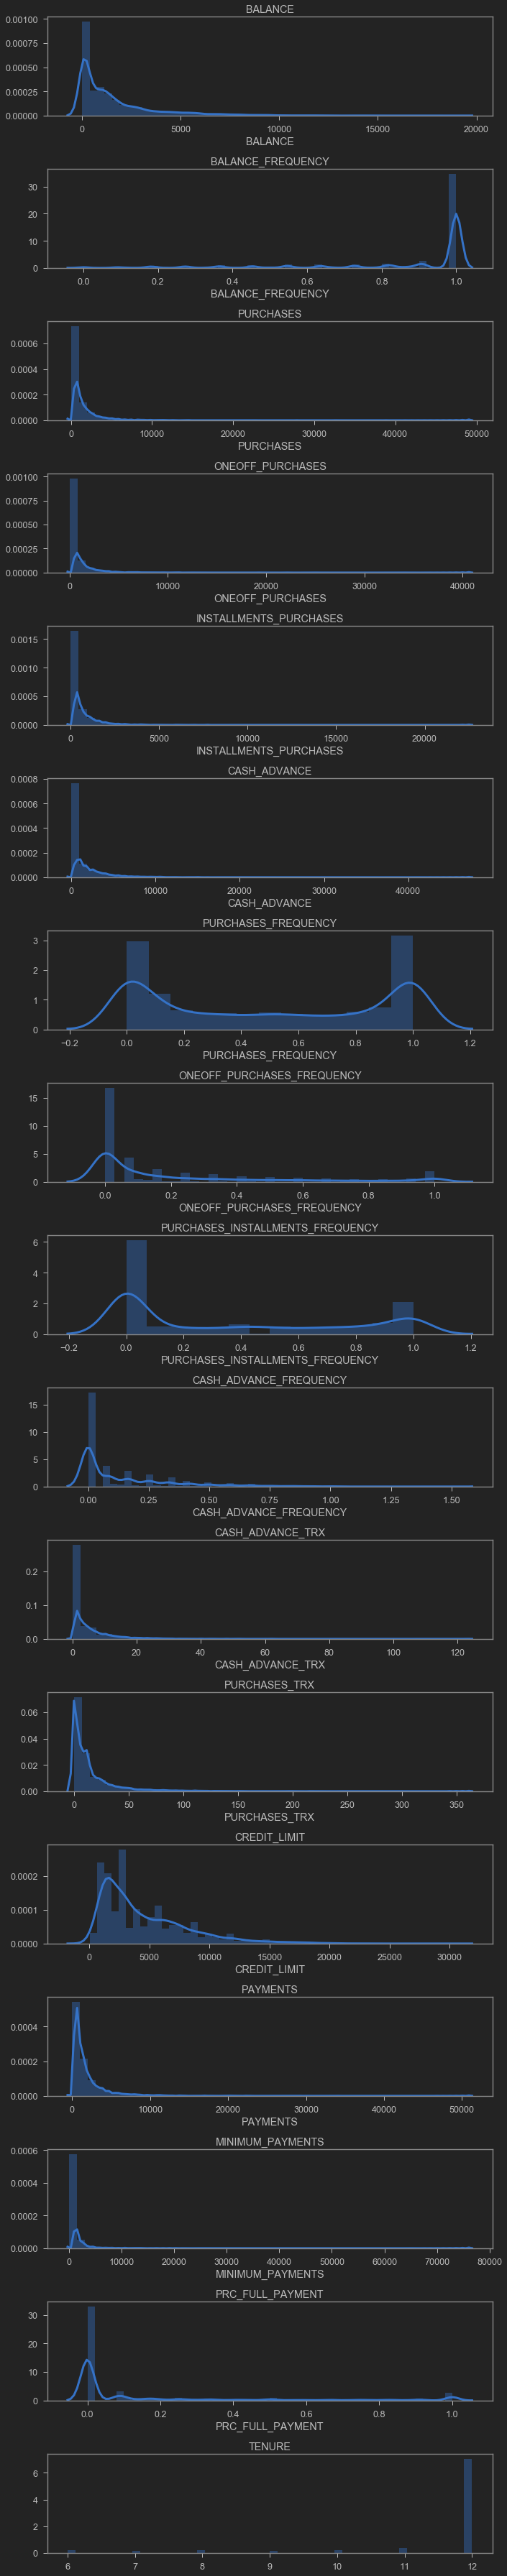

In [60]:
plt.figure(figsize=(10,50))
try:
    for i in range(len(creditcard_df.columns)):
        plt.subplot(17,1,i+1)
        sns.distplot(creditcard_df[creditcard_df.columns[i]],kde_kws={"color":"b","lw":3})
        plt.title(creditcard_df.columns[i])
except RuntimeError:
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [61]:
correlations=creditcard_df.corr()

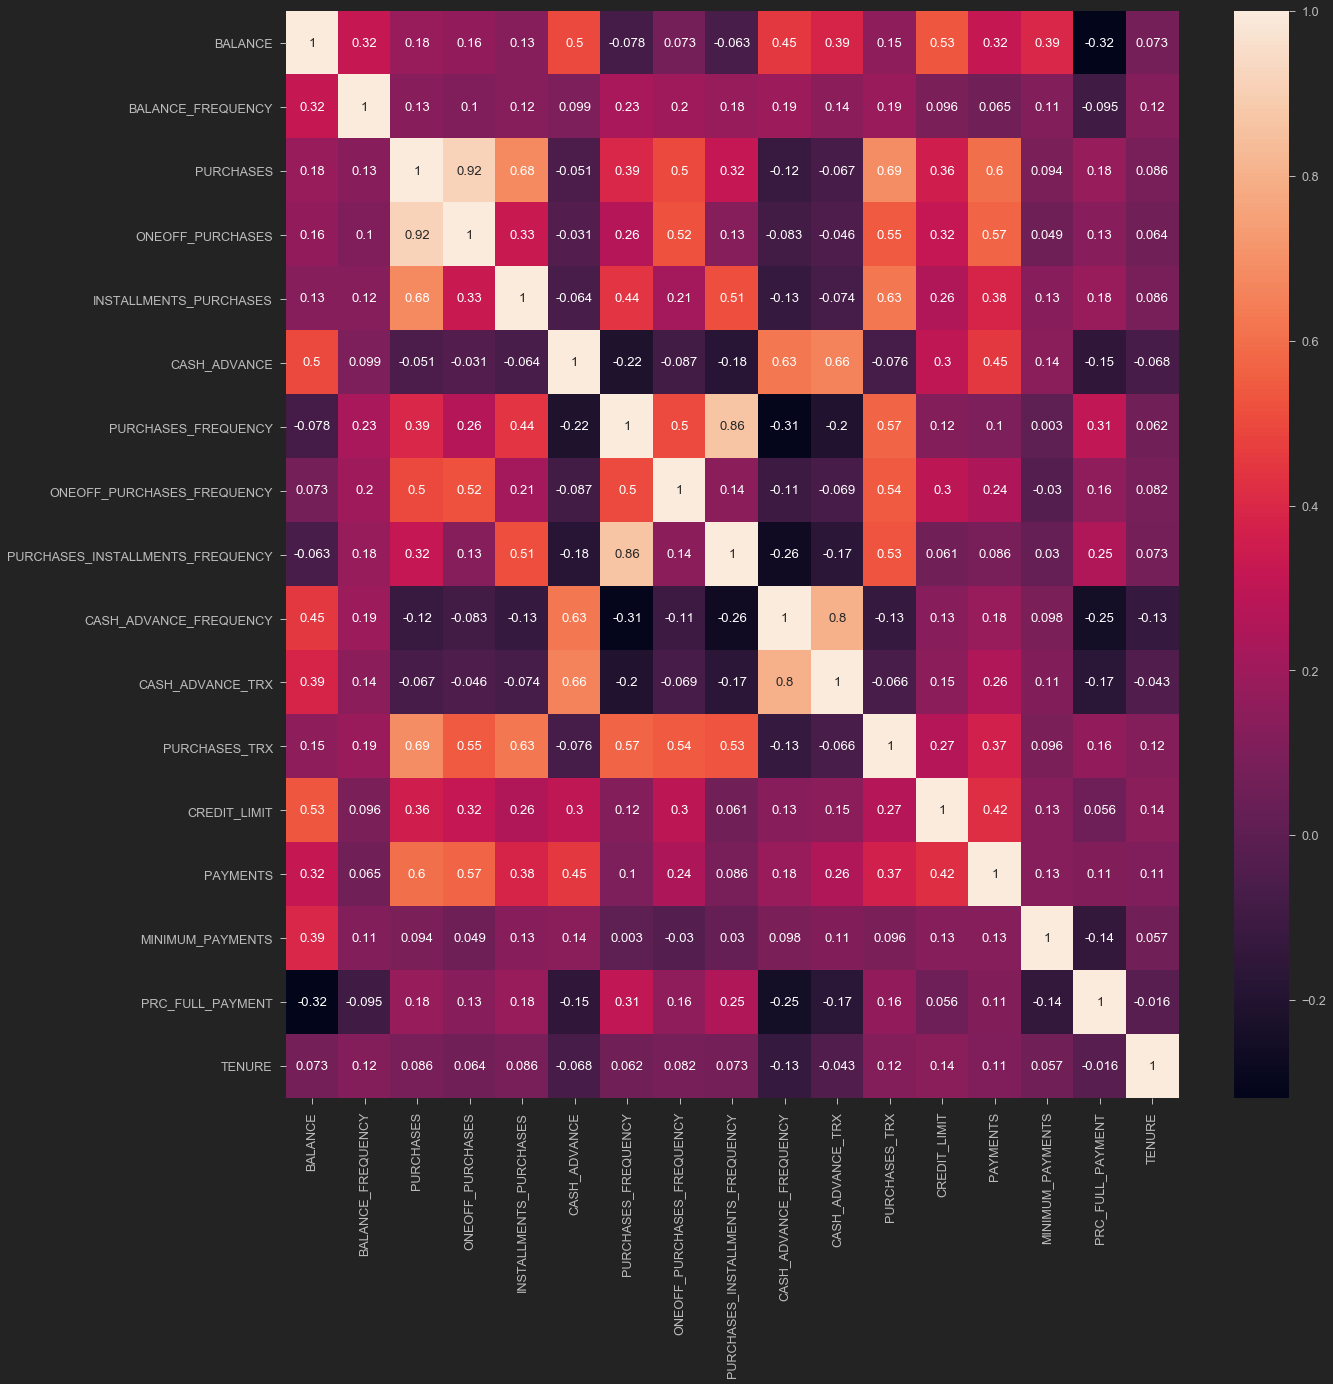

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(correlations,annot=True)
plt.show()

## k-means clustering and using elbow method to find optimal no. of clusters

In [67]:
scaler=StandardScaler()
creditcard_df_scaler=scaler.fit_transform(creditcard_df)

In [68]:
creditcard_df_scaler.shape

(8950, 17)

In [69]:
creditcard_df_scaler

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [73]:
scores_1=[]
range_values=range(1,20)
for i in range_values:
    Kmeans=KMeans(n_clusters=i)
    Kmeans.fit(creditcard_df_scaler)
    scores_1.append(Kmeans.inertia_)

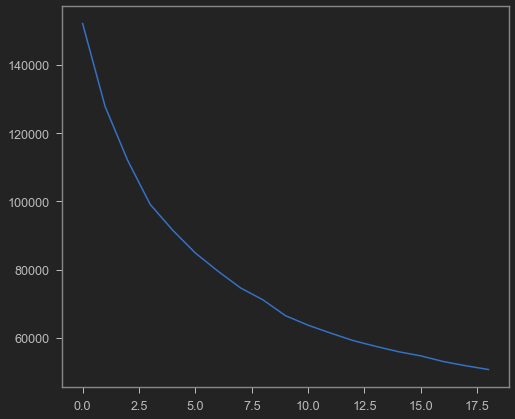

In [74]:
plt.plot(scores_1)
plt.show()

In [76]:
cluster_centers=pd.DataFrame(data=Kmeans.cluster_centers_,columns=[creditcard_df.columns])
cluster_centers=scaler.inverse_transform(cluster_centers)


In [77]:
cluster_centers=pd.DataFrame(data=Kmeans.cluster_centers_,columns=[creditcard_df.columns])

In [78]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.724658,-1.557238,-0.238680,-0.216207,-0.167407,-0.408351,-0.282200,-0.362730,-0.252512,-0.599727,-0.425044,-0.340111,-0.049698,-0.178065,-0.310874,2.168093,0.162750
1,-0.701903,0.310898,0.002044,-0.294339,0.544937,-0.456002,1.065076,-0.503510,1.293638,-0.658499,-0.468729,0.160506,-0.143482,-0.231486,-0.279581,2.010834,0.251257
2,1.067867,0.415129,-0.160462,-0.104111,-0.188354,1.621075,-0.179256,0.046185,-0.226515,2.653647,2.802780,-0.108901,0.537637,0.376869,0.256245,-0.407016,-0.116847
3,-0.194550,-0.499973,-0.341065,-0.205257,-0.429406,0.276713,-0.846824,-0.299043,-0.819611,0.602521,0.136683,-0.495796,-0.476541,-0.372870,-0.181367,-0.382187,-3.195883
4,0.278986,0.360880,-0.408851,-0.294464,-0.425783,0.514620,-1.018270,-0.516107,-0.835321,1.136348,0.691062,-0.530162,-0.160447,-0.027080,-0.002737,-0.410189,0.231625
5,0.827114,0.471568,3.396492,3.759589,1.123770,-0.257083,1.093383,2.181523,0.792527,-0.340937,-0.241834,3.103389,1.308915,1.894962,0.211044,0.682525,0.343697
6,1.290312,0.454124,-0.039755,-0.268864,0.399233,-0.000938,0.022469,-0.528409,0.262206,-0.252602,-0.060885,0.219536,-0.004964,-0.129901,11.641856,-0.525551,0.298409
7,1.489234,0.432804,4.066774,1.218851,7.383151,-0.020677,1.112196,1.054298,1.385633,-0.258912,-0.041889,4.551852,1.766389,2.487850,1.039234,0.314413,0.277653
8,-0.695960,-2.323094,-0.326620,-0.236005,-0.338485,-0.304087,-0.624070,-0.460388,-0.486091,-0.500923,-0.368474,-0.437717,-0.232842,-0.272231,-0.239063,-0.323094,0.192594
9,0.602706,0.456682,1.080388,0.712651,1.244197,-0.179204,1.183510,1.311392,1.309815,-0.229727,-0.195431,1.726991,0.836361,0.503699,0.116592,-0.304200,0.331998


In [80]:
labels=Kmeans.fit_predict(creditcard_df_scaler)

In [82]:
labels.max()

18

In [83]:
creditcard_df_cluster=pd.concat([creditcard_df,pd.DataFrame({"cluster":labels})],axis=1)

In [85]:
creditcard_df_cluster

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,10
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,10
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,10
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,10


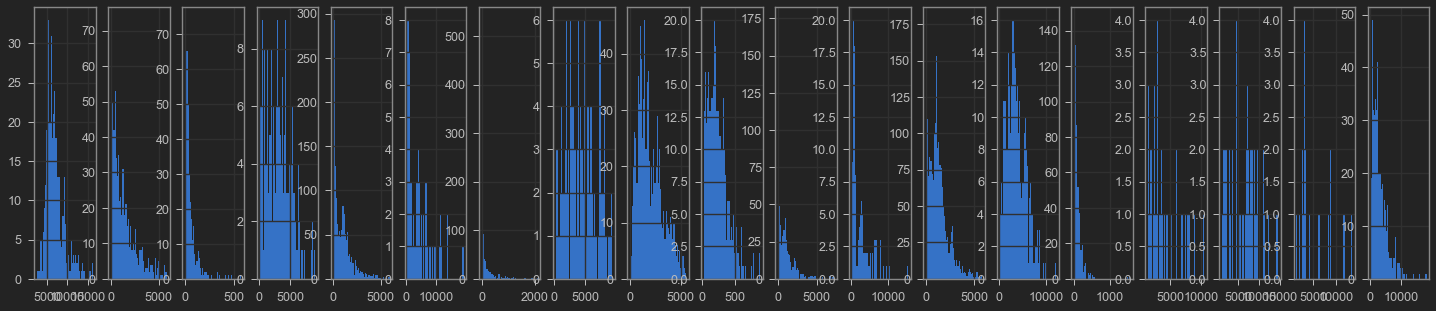

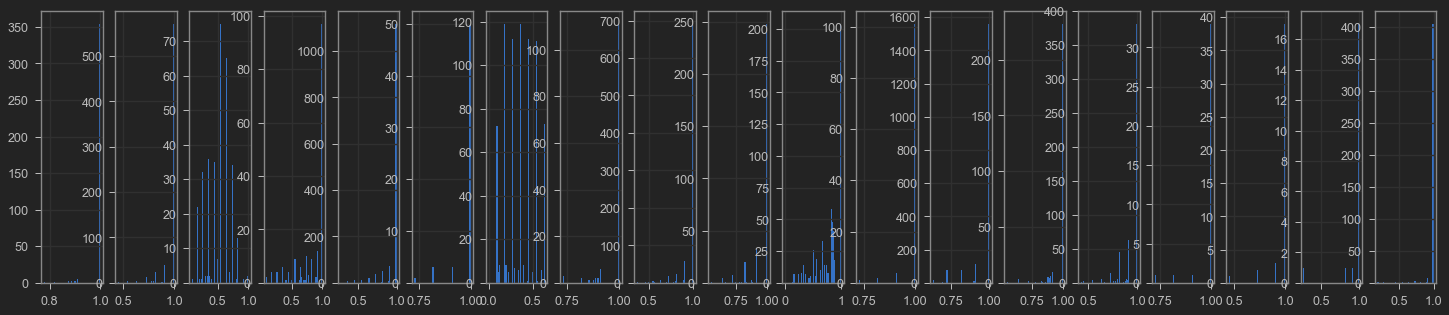

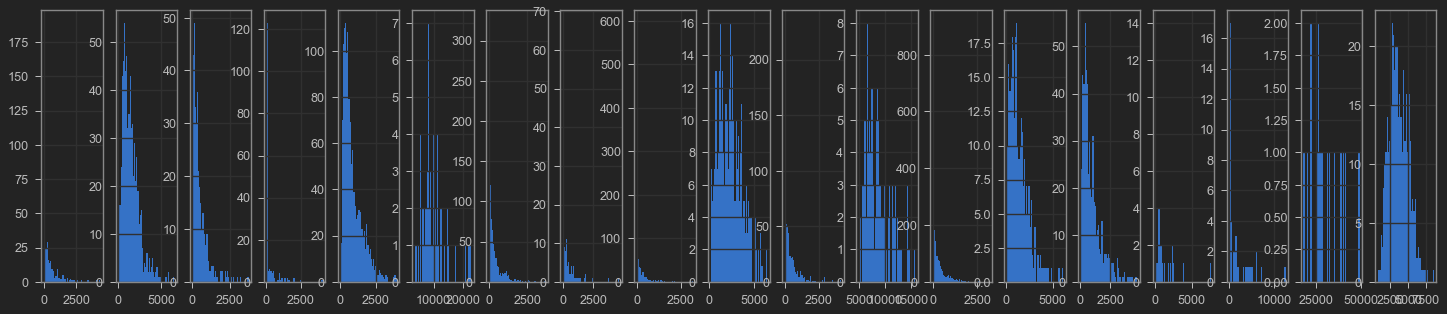

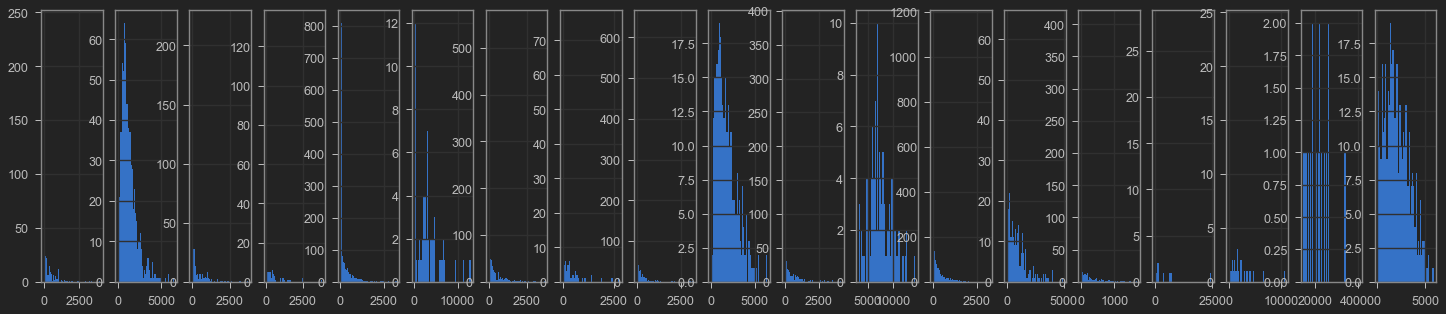

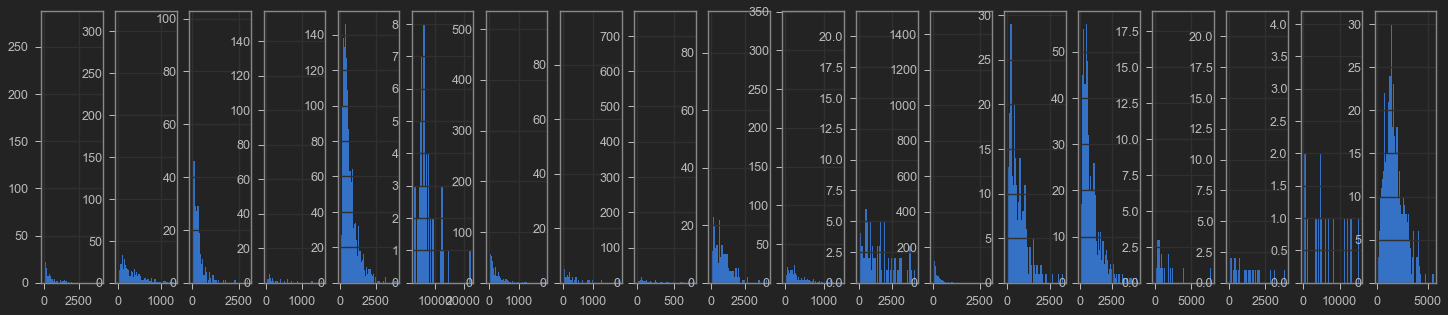

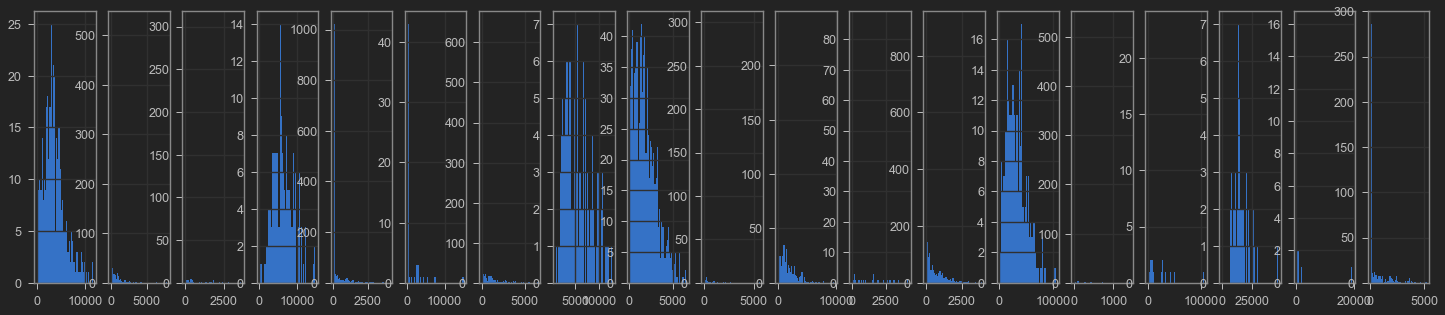

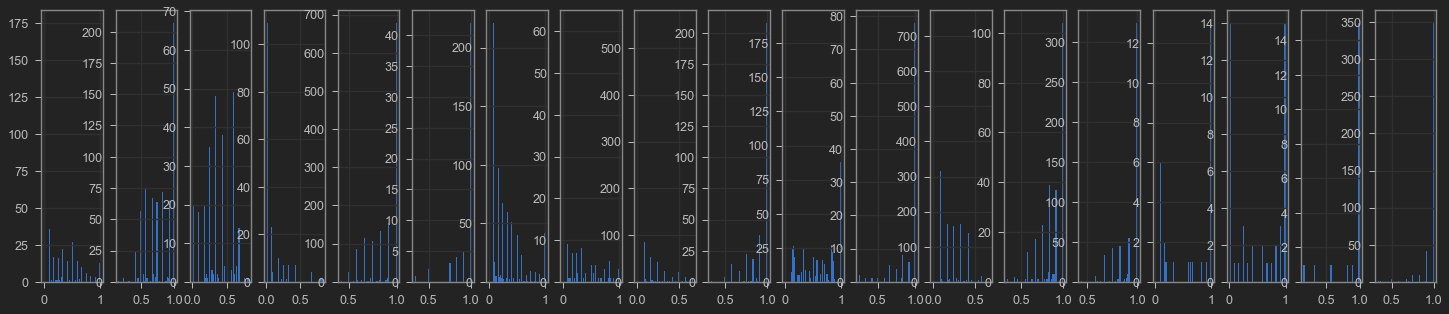

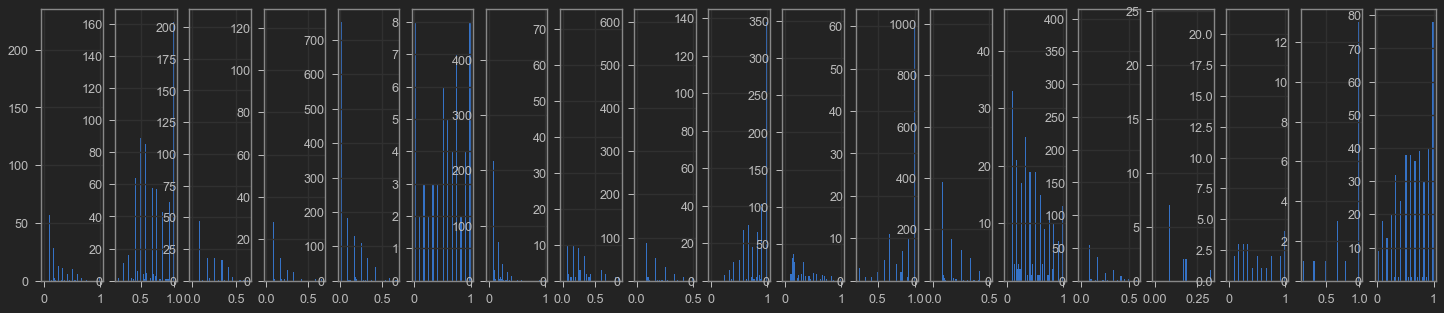

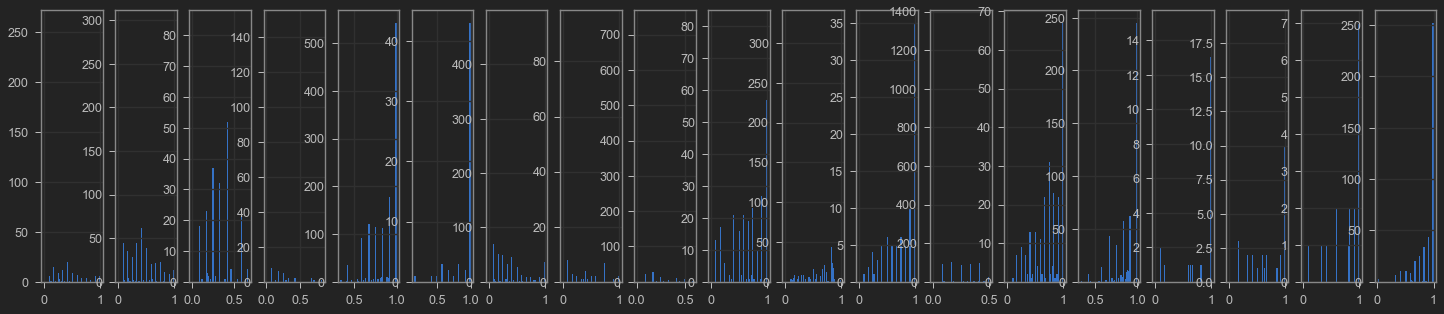

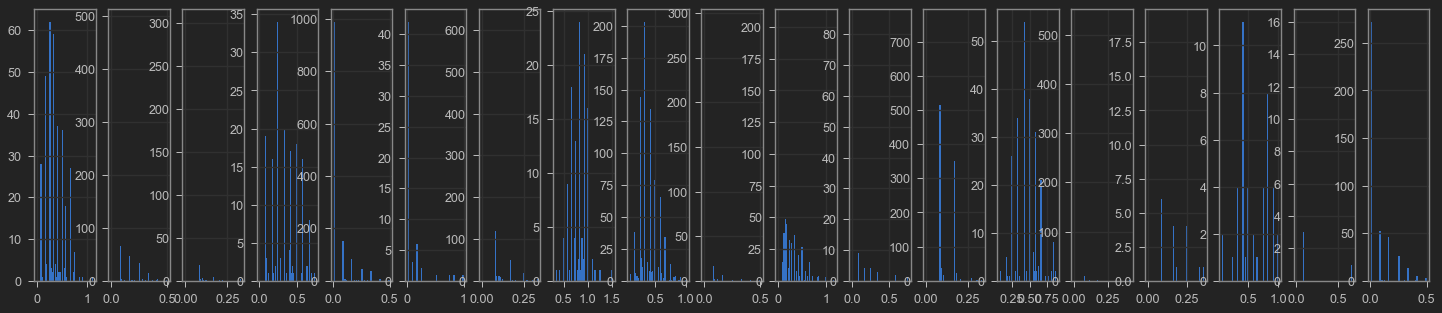

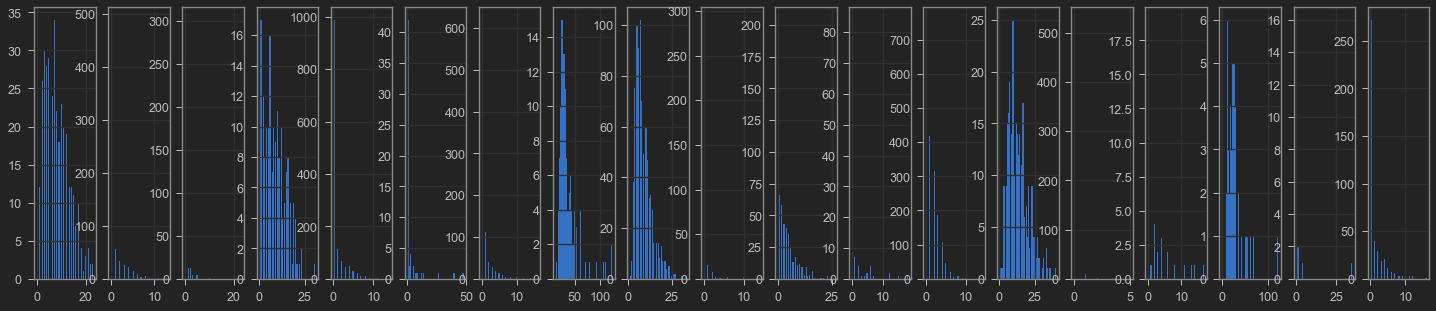

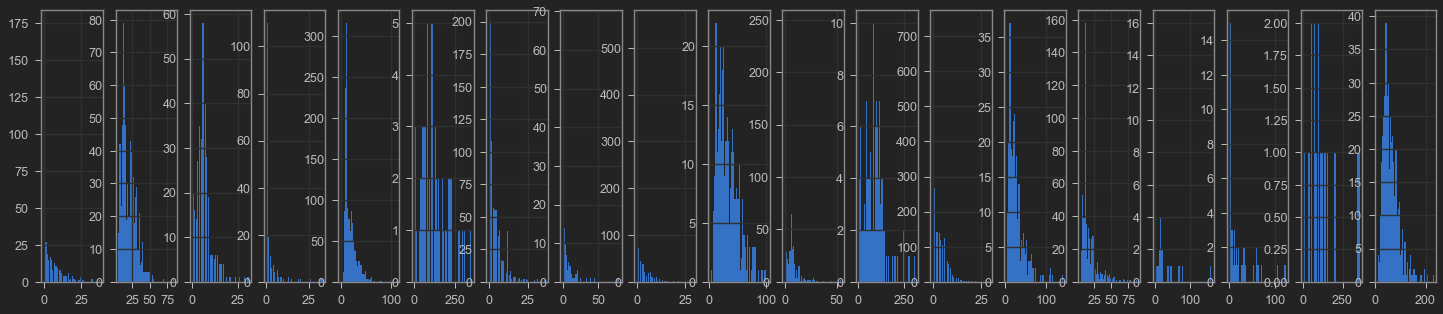

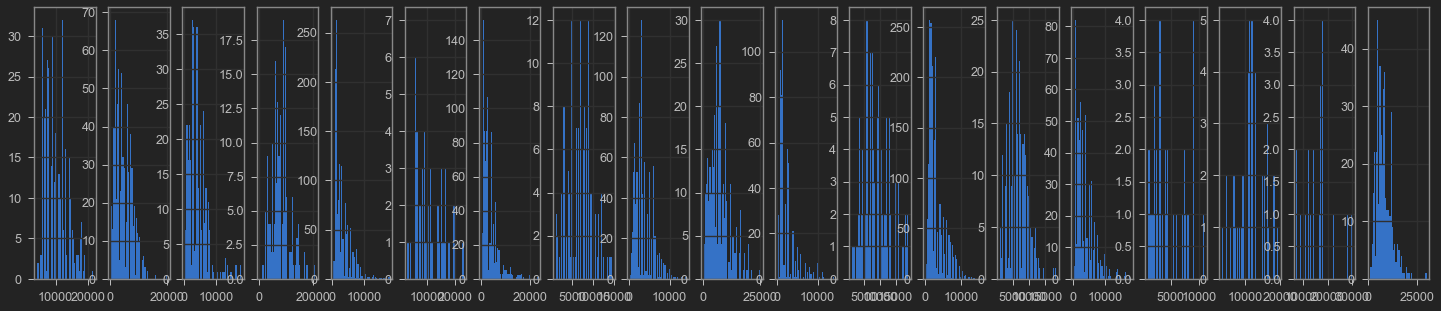

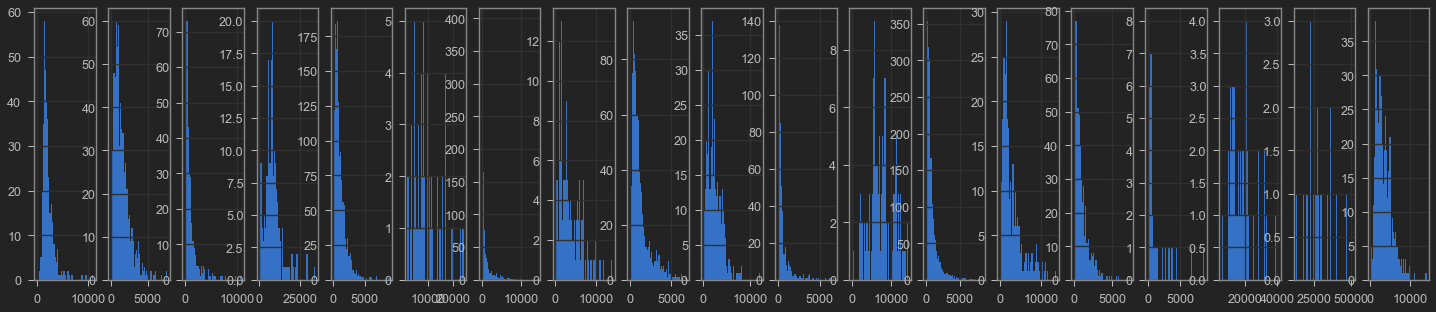

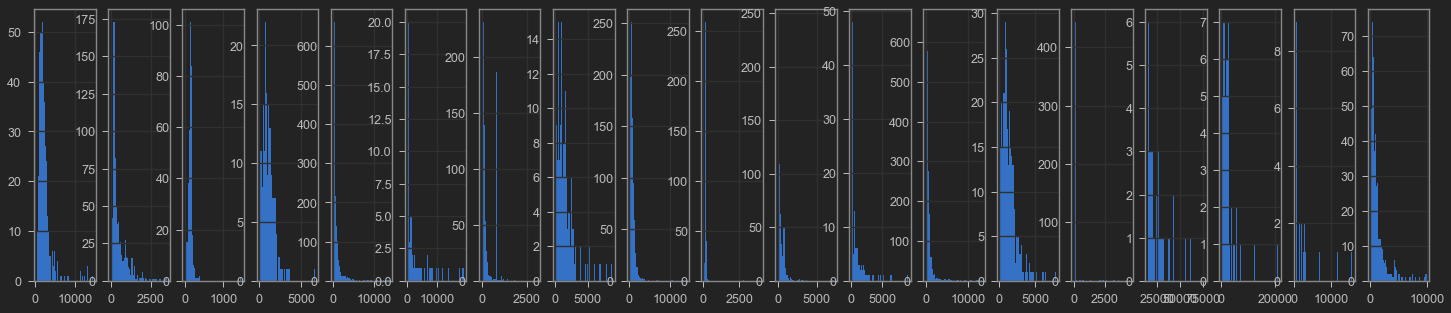

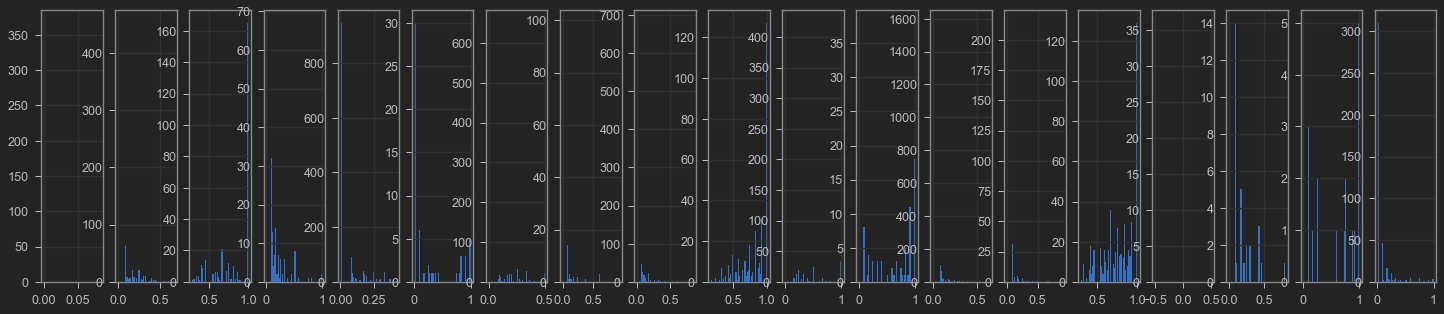

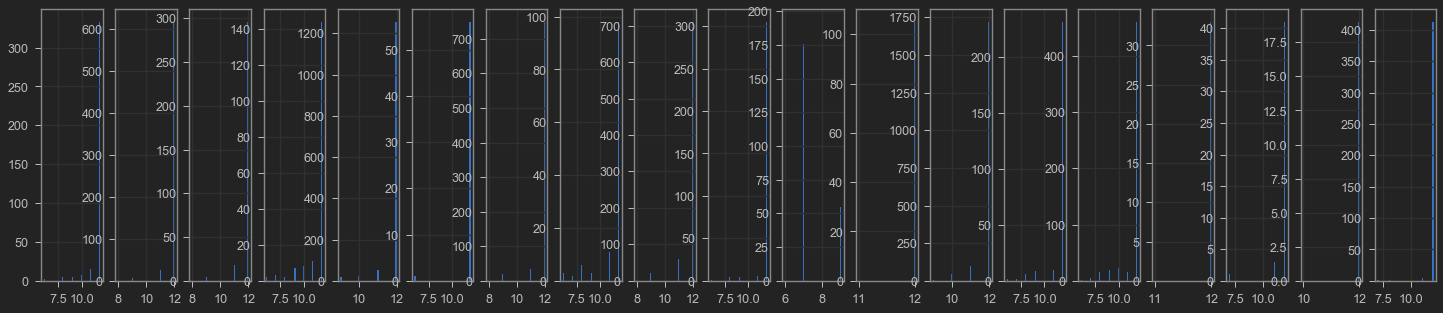

In [86]:
for i in creditcard_df.columns:
    plt.figure(figsize=(25,5))
    for j in range(19):
        plt.subplot(1,19,j+1)
        cluster=creditcard_df_cluster[creditcard_df_cluster["cluster"]==j]
        cluster[i].hist(bins=50)
plt.show()

## principal component analysis

In [87]:
pca=PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_df_scaler)

In [88]:
principal_comp

array([[-1.68221843, -1.07646613],
       [-1.13829721,  2.50649746],
       [ 0.96971725, -0.38376548],
       ...,
       [-0.92620148, -1.81080727],
       [-2.33655506, -0.65794833],
       [-0.55641154, -0.40054796]])

In [89]:
pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-1.682218,-1.076466
1,-1.138297,2.506497
2,0.969717,-0.383765
3,-0.873634,0.043217
4,-1.599431,-0.688601


In [93]:
pca_df=pd.concat([pca_df,pd.DataFrame({"cluster":labels})],axis=1)

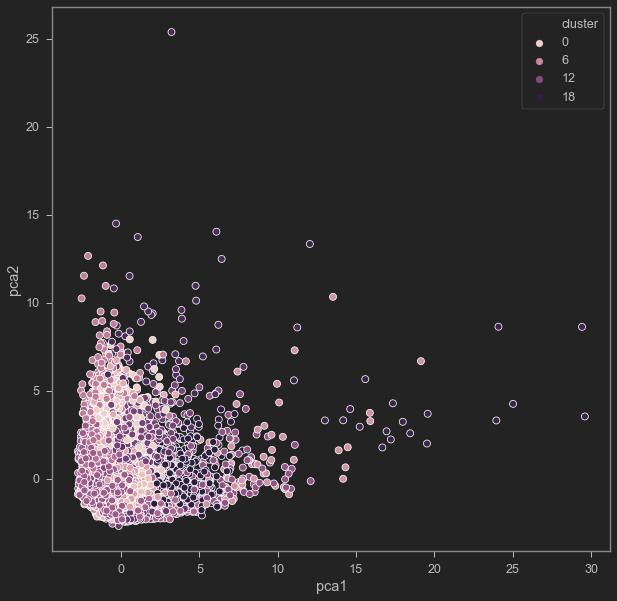

In [97]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df)
plt.show()